In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
df = pd.read_csv('/Users/josephhartono/Downloads/FINAL_data_pie_draftyear_overall_salary.csv', index_col = [0])
df

,PLAYER,PIE,Year,overall,yearsAfter,salary
1,Aaron McKie,9.5,1996,17.0,2,1040000
3,Acie Earl,5.6,1996,19.0,3,1235000
4,Adam Keefe,8.3,1996,10.0,4,1950000
6,Alan Henderson,7.5,1996,16.0,1,910000
8,Allan Houston,7.8,1996,11.0,3,5000000
...,...,...,...,...,...,...
9557,Willy Hernangomez,13.3,2016,35.0,1,1375000
9558,Wilson Chandler,9.8,2016,23.0,9,11200000
9560,Zach LaVine,9.5,2016,13.0,2,2240880
9561,Zach Randolph,15.2,2016,19.0,15,10361445


In [3]:
max_salaries = []

for year in set(df['Year']):
    money = df.loc[df['Year'] == year]
    _max = 0
    for sal in money['salary']:
        if sal > _max:
            _max = sal
    
    max_salaries.append(_max)
max_salaries

[10714000,
 20500000,
 18500000,
 17142858,
 19610000,
 22400000,
 25200000,
 28000000,
 27696430,
 20000000,
 21000000,
 23750000,
 24751934,
 23239562,
 24806250,
 25244493,
 27849149,
 30453805,
 23500000,
 25000000,
 30963450]

In [4]:
norm_sals = []
for row in df.itertuples():
     
    try:
        norm_sals.append(row.salary / max_salaries[(row.Year - 1996)])
    except:
        print("error")



In [5]:
norm_sals

[0.09706925518013813,
 0.11526974052641403,
 0.18200485346275902,
 0.08493559828262087,
 0.4666791114429718,
 0.21159230912824342,
 0.8754900130670151,
 0.02053388090349076,
 0.025760686951652043,
 0.6211498973305954,
 0.02333395557214859,
 0.1437371663244353,
 0.15120403210752287,
 0.04853462759006907,
 0.23753966772447266,
 0.02053388090349076,
 0.3521560574948665,
 0.08064215045734553,
 0.2863543027814075,
 0.16875116669777862,
 0.0894157177524734,
 0.14933731566175099,
 0.051428038081015495,
 0.12068321821915251,
 0.1043494493186485,
 0.15820421877916743,
 0.31734179578122085,
 0.03593429158110883,
 0.29867463132350197,
 0.10677618069815195,
 0.0828822101922718,
 0.10425611349635991,
 0.07000186671644577,
 0.28439425051334705,
 0.11526974052641403,
 0.02053388090349076,
 0.7466865783087548,
 0.037334328915437746,
 0.4200112002986746,
 0.09706925518013813,
 0.11526974052641403,
 0.09809594922531267,
 0.048627963412357665,
 0.6074295314541721,
 0.14439051708045547,
 0.023100616016427

In [6]:
df['norm_sal'] = norm_sals

In [7]:
all_avg_sals = []

for ovr in set(df['overall']):
    avg_sals = []
    for year in set(df['yearsAfter']):
        df1 = df[(df['overall'] == ovr) & (df['yearsAfter'] == year)]
        #display(df1)
        print(df1['norm_sal'].mean())

        avg_sals.append(df1['norm_sal'].mean())
    break
    all_avg_sals.append(avg_sals)

0.18620919840024883
0.19819113788123938
0.20832259958226956
0.2826259929869894
0.4841486825400177
0.4925809436564655
0.5084551113893827
0.5331584235157202
0.5469701289569028
0.5356645844472324
0.6224166941545088
0.5860344784360153
0.7034094140294902
0.5565750000100296
0.46599505541965286
0.33195500667977557
0.40809370973713394
0.6430666662123179
0.12725484504913076
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [8]:
all_avg_sals

[]

In [32]:
df
df.to_csv('histogramData.csv')

In [10]:
all_average_norm_sal = []
all_std = []
for year in set(df['yearsAfter']):
    
    average_norm_sal = []
    stds = []


    for ovr in set(df['overall']):
        try:
            df1 = df[(df['overall'] == ovr) & (df['yearsAfter']==year)]
            average = df1['norm_sal'].mean()
            std = df1['norm_sal'].std()
            average_norm_sal.append(average)
            stds.append(std)
        except:
            average_norm_sal.append(0.3)
    all_std.append(stds)
    all_average_norm_sal.append(average_norm_sal)
#all_average_norm_sal

<Figure size 640x480 with 0 Axes>

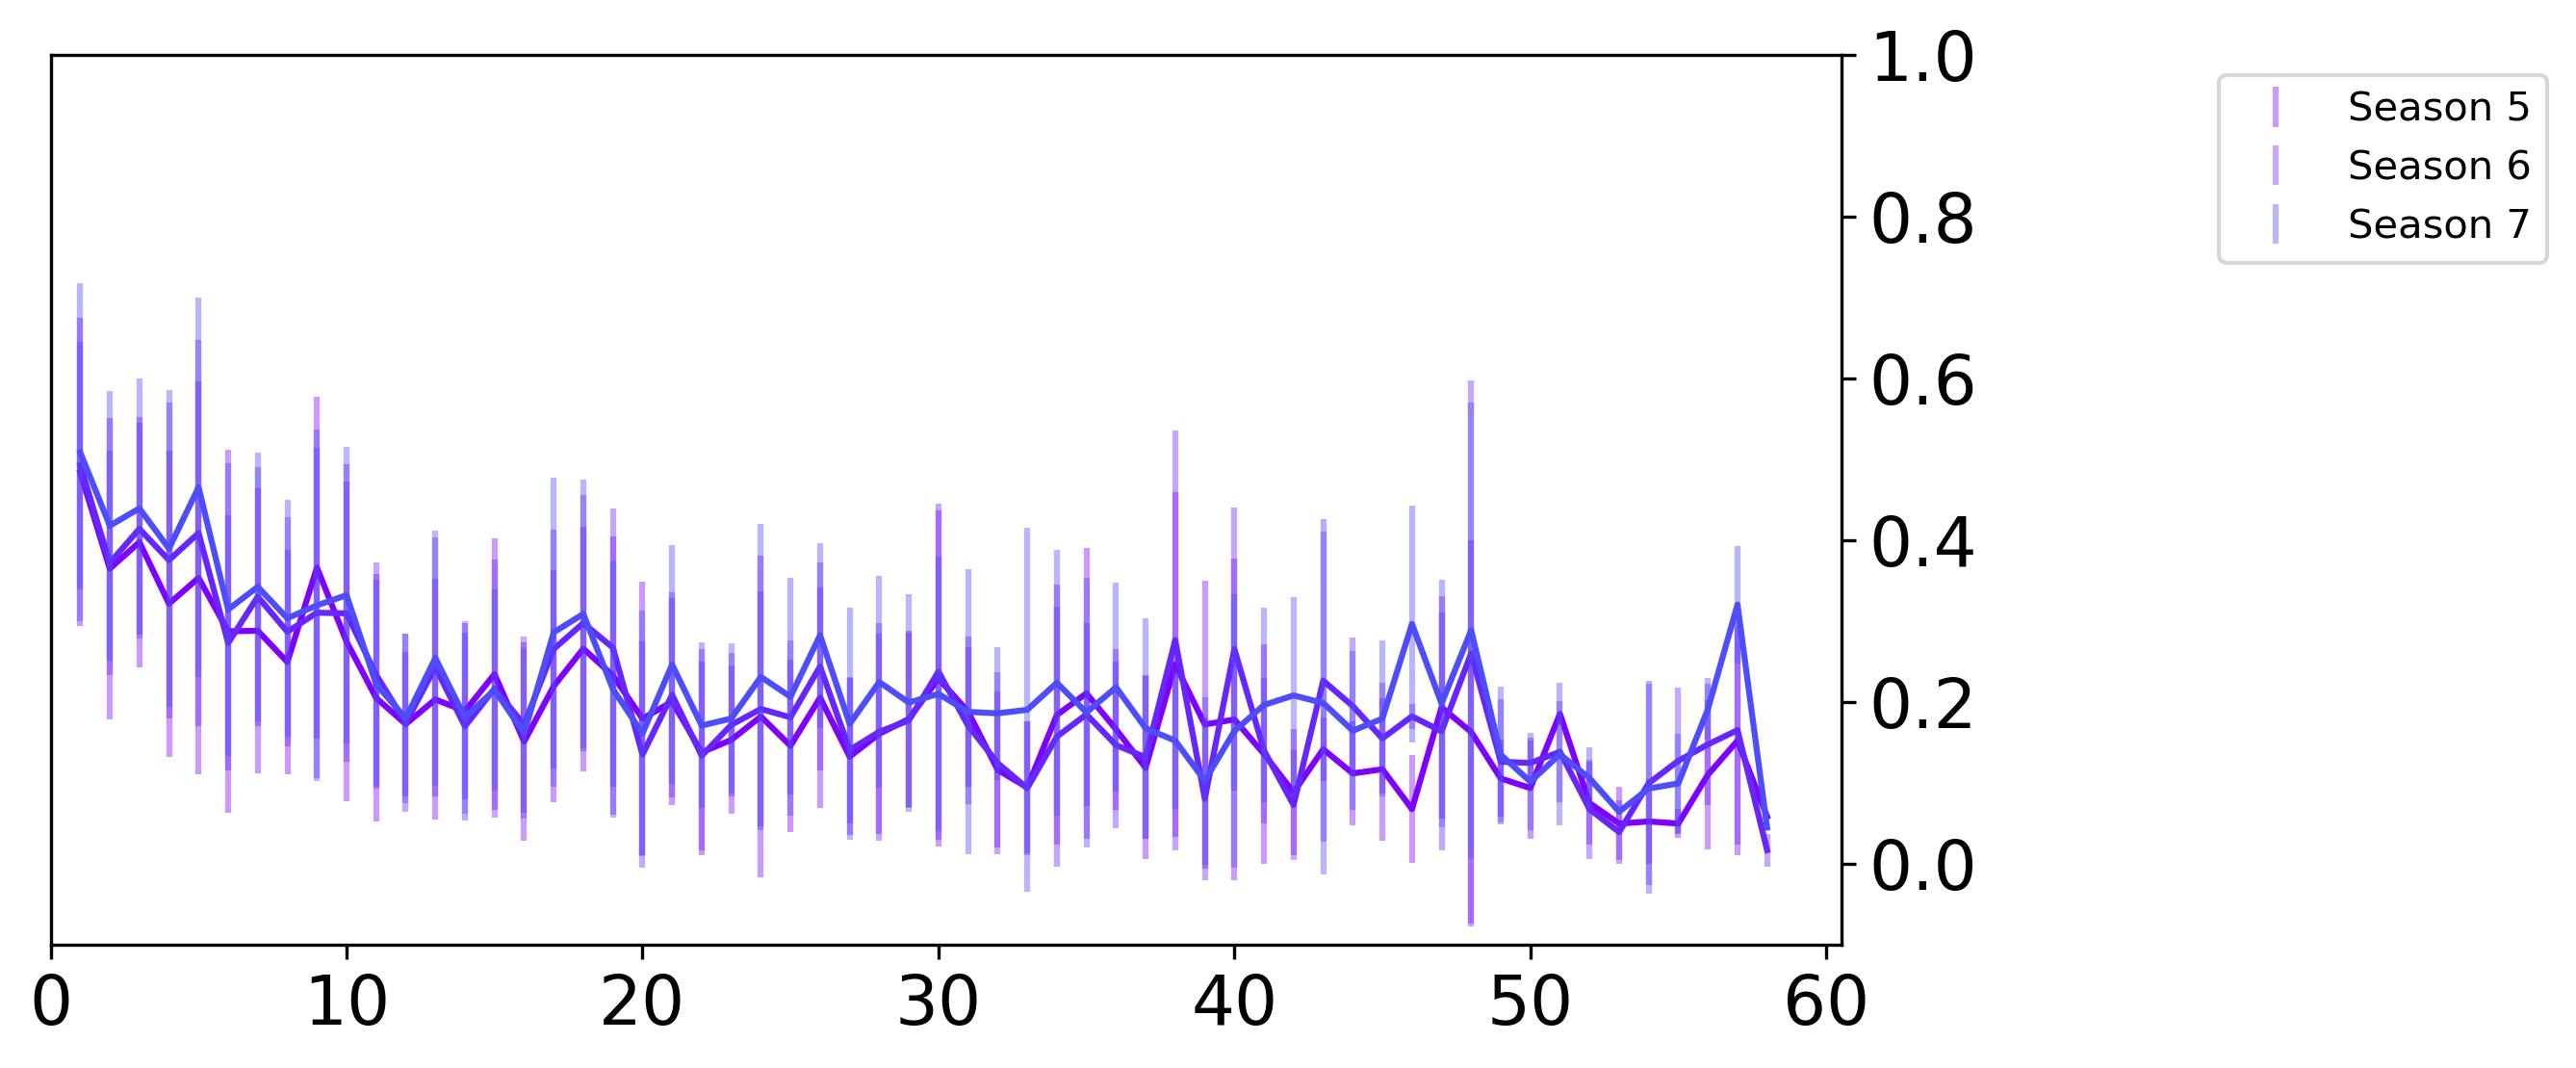

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()

from matplotlib.pyplot import figure

ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()

#ex = 0

# starting = ex * 4
# n = ex * 4 + 4
starting = 4
n=7

color = iter(cm.rainbow(np.linspace(0, 1, 21)))

for i in range(starting,n):
    x = np.arange(1,61,1)
    #ax.scatter(x, all_average_norm_sal[i], alpha=1,s=3, c="black")
    c = next(color)
    ax.errorbar(x, all_average_norm_sal[i], all_std[i], alpha = 0.4,label=f"Season {i+1}",ls='none',c=c)
    ax.plot(x, all_average_norm_sal[i], c=c)


ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(-0.1,1.0)
ax.set_xlim(0,60.5)
ax.yaxis.tick_right()
ax.legend(loc="upper left",bbox_to_anchor=(1.2,1))

# if ex == 0:
#     plt.savefig('FourSal.png')
# if ex == 1: 
#     plt.savefig('EightSal.png')
# if ex == 2:
#     plt.savefig('TwelveSal.png')
# if ex == 3:
#     plt.savefig('SixteenSal.png')
plt.savefig('FifthSal.png')
plt.show()

In [26]:
starting = 5
n=8

avgSal = []
stdSal = []

for ovr in set(df['overall']):
    
    averageSAL = []
    stanSAL = []
    
    for i in range(starting,n):
    
        df1 = df[(df['overall'] == ovr) & (df['yearsAfter'] == i)]
        if not df1.empty:
            averageSAL.append(df1['norm_sal'].mean())
            stanSAL.append(df1['norm_sal'].std())
        else:
            averageSAL.append(0)
            stanSAL.append(0)
            

        
    avgSal.append(sum(averageSAL) / len(averageSAL))
    stdSal.append(sum(stanSAL) / len(stanSAL))
    #stdPie.append(df1["PIE"].std())
        
display(avgSal)
display(stdSal)

[0.5113981595205228,
 0.4095728457103634,
 0.44352095796201163,
 0.3951218338112013,
 0.4439271550304253,
 0.29580502908205836,
 0.33430932548003583,
 0.3025286090675117,
 0.34755357221740196,
 0.32743253918250054,
 0.23563172435174584,
 0.1954781391935916,
 0.2507012063031668,
 0.18849111399563115,
 0.23085807117959223,
 0.17661280438276203,
 0.3012085047316933,
 0.27963932922988416,
 0.22498516930766257,
 0.1616082663642763,
 0.22339278216791345,
 0.17118627953740254,
 0.18192447351702293,
 0.21875602420608428,
 0.20388179729326975,
 0.25739593658478416,
 0.15957905178421225,
 0.2115116623162715,
 0.18053498221234113,
 0.2380358645640179,
 0.21393610770634122,
 0.16175730719685036,
 0.15141036443548056,
 0.21125622316097617,
 0.21767948747261,
 0.21092326911423187,
 0.15366564295463428,
 0.19930315746953728,
 0.1140020174642274,
 0.21170581399286795,
 0.19258824057134494,
 0.17275538008978056,
 0.21729701333177073,
 0.1712465027940766,
 0.18813047746722503,
 0.2449724041016885,
 0.21

[0.19141317118420773,
 0.17849727538145985,
 0.16215351021330018,
 0.2002696976118131,
 0.25207545386534463,
 0.18656497106941142,
 0.15919371410305336,
 0.1515073376146074,
 0.23541675540047158,
 0.19206370948278184,
 0.13884335481881524,
 0.12173326165505692,
 0.16260404395235487,
 0.12081051891580015,
 0.1519425148111299,
 0.10497244694883068,
 0.1651738262478646,
 0.15694517639565259,
 0.16397260464634894,
 0.14436127601535856,
 0.14223747063566503,
 0.10461037410710287,
 0.10034874601045758,
 0.18020057980608373,
 0.13312612799825715,
 0.12863937420200053,
 0.12591128770219925,
 0.13404010907177547,
 0.11647584265287521,
 0.18586702466821647,
 0.13994250990697768,
 0.11150601290066121,
 0.12918609280436957,
 0.18154453250151248,
 0.1975667409052829,
 0.12402194470856394,
 0.1270892240815502,
 0.1264729766382702,
 0.09047277533771027,
 0.17506035041240361,
 0.110947600380663,
 0.099639849995434,
 0.2152805800409322,
 0.09573410499358596,
 0.11680893683757916,
 0.08534353256138816,


<Figure size 640x480 with 0 Axes>

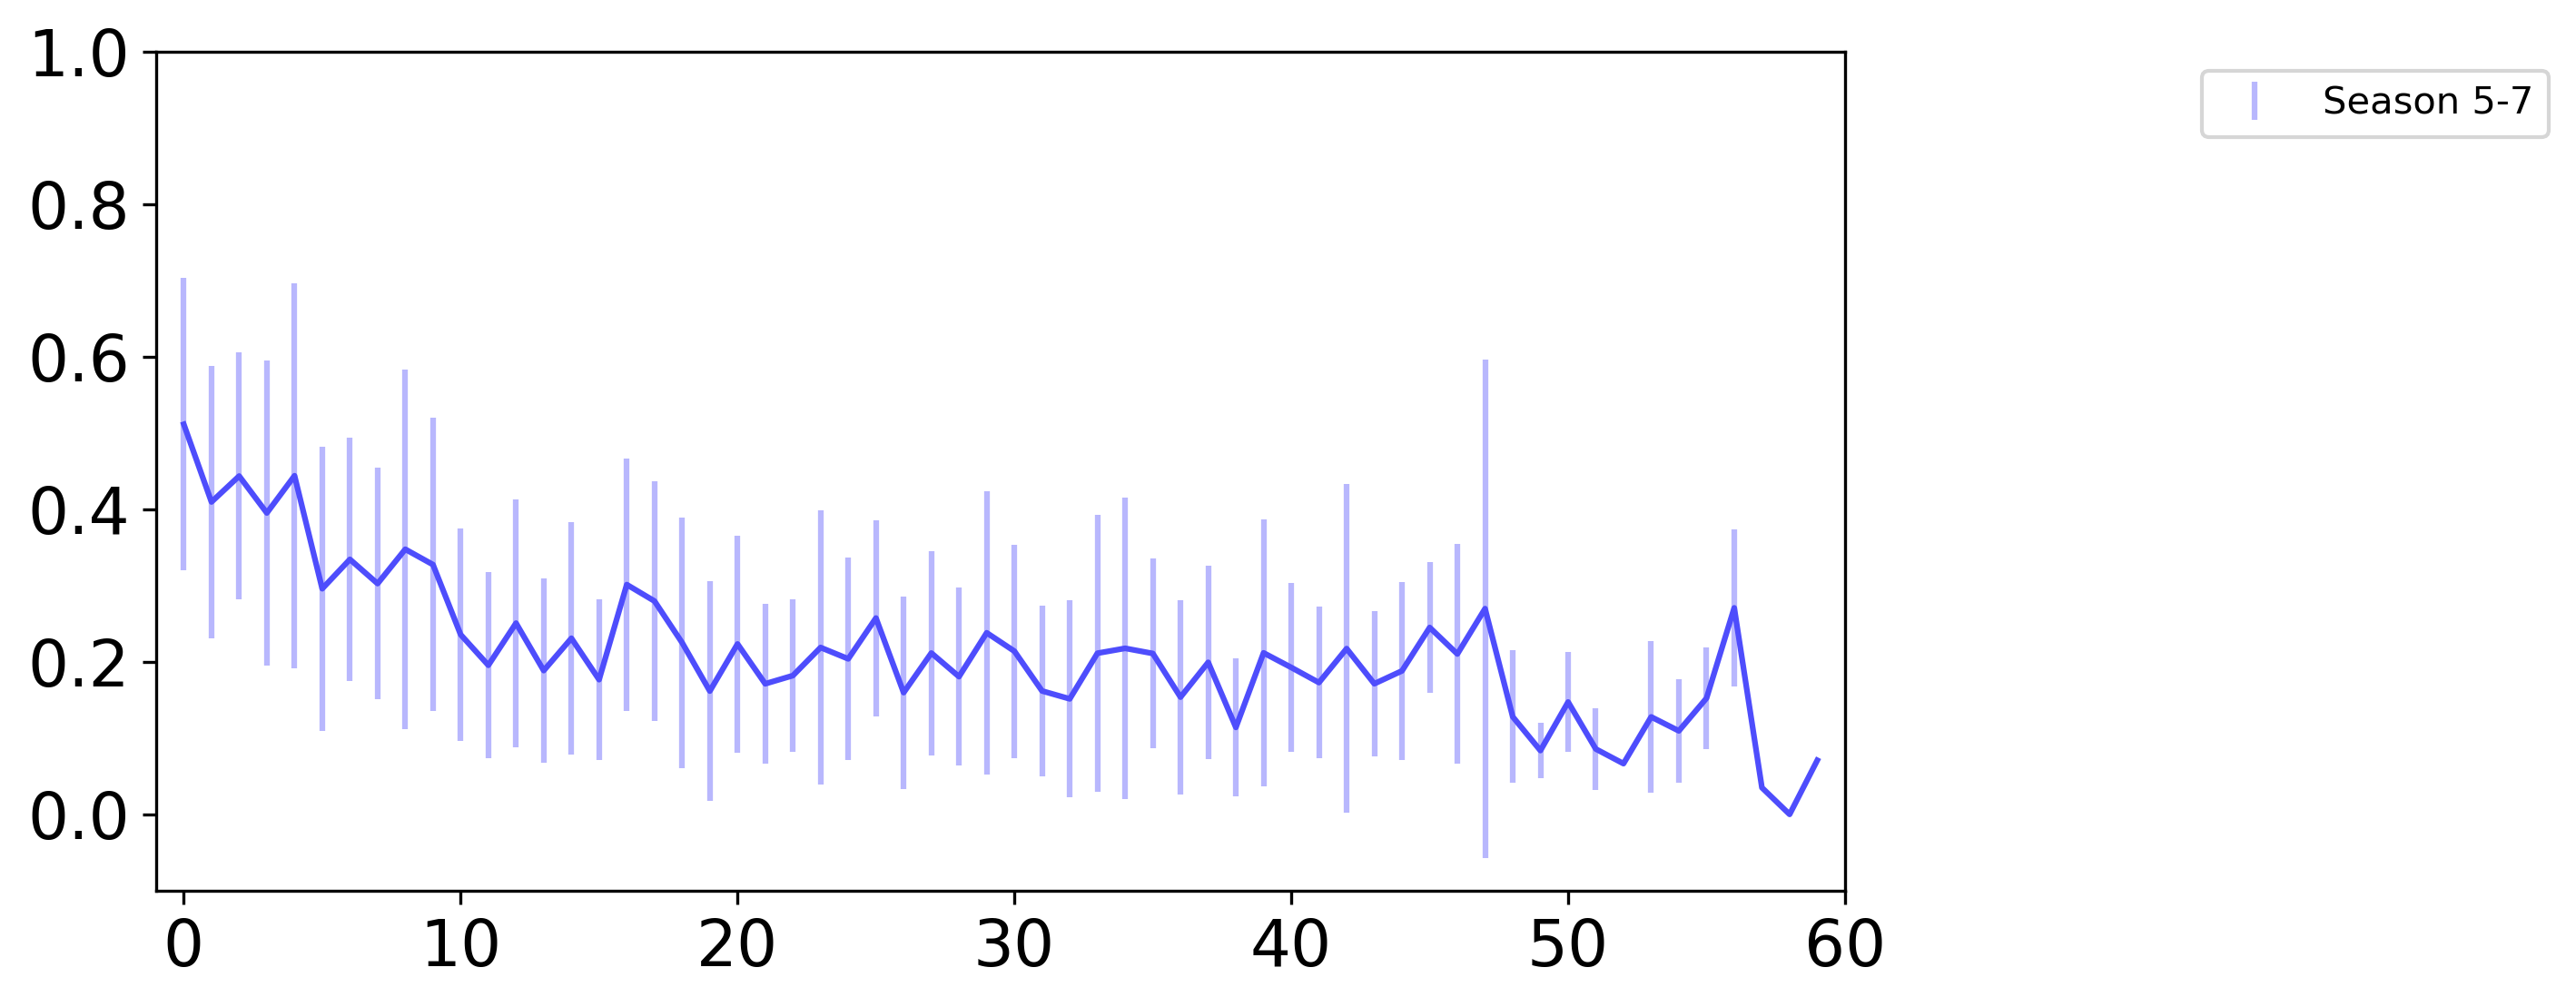

In [29]:

from matplotlib.pyplot import figure
plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()

from matplotlib.pyplot import cm


ex = 0

# starting = ex * 4
# n = ex * 4 + 4
starting = 5
n=8

color = iter(cm.rainbow(np.linspace(0, 1, 4)))


x = np.arange(0.0, 60.0, 1)
ax.errorbar(x, avgSal, stdSal, alpha = 0.4,label="Season 5-7",ls='none',c=c)
ax.plot(x,avgSal,c=c)

    
ax.set_xlim(-1, 60)
ax.set_ylim(-0.1, 1)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

#ax.grid()
#ax.legend(['Drafted Season', 'Second Season', 'Third Season'])
plt.legend(loc="upper left", bbox_to_anchor=(1.2,1.0))

# if ex == 0:
#     plt.savefig('FourPie.png')
# if ex == 1:
#     plt.savefig('EightPie.png')
# if ex == 2:
#     plt.savefig('TwelvePie.png')
# if ex == 3:
#     plt.savefig('SixteenPie.png')
# plt.savefig('firstFourPIE.png')
plt.show()